# Import Libraries


In [60]:
# 1. to handle the data
import pandas as pd
import numpy as np
import os


# from imblearn.combine import SMOTEENN


# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
import plotly.express as px
import shap


# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.impute import SimpleImputer, KNNImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


# 4. import pipeline and feature selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFromModel
# from sklearn.decomposition import PCA, TruncatedSVD



# 5. Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, RandomForestRegressor
from xgboost import XGBClassifier


# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report ,recall_score , f1_score, roc_auc_score


# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)

# 9. For saving the model
import joblib


# Load the Dataset



In [2]:
df = pd.read_csv('/content/heart_failure_clinical_raw_data.csv')

In [20]:
df.sample(10)

,Age,Anaemia,CreatininePhosphokinase,Diabetes,EjectionFraction,HighBloodPressure,PlateletCount,SerumCreatinine,SerumSodium,Sex,SmokingStatus,FollowupDays,DeathEvent
288,65,0,892,1,35,0,263358,1.1,142,0,0,256,0
13,50,1,168,0,38,1,276000,1.1,137,1,0,11,1
151,62,0,30,1,60,1,244000,0.9,139,1,0,117,0
65,60,0,68,0,20,0,119000,2.9,127,1,1,64,1
138,62,0,281,1,35,0,221000,1.0,136,0,0,108,0
182,65,0,395,1,25,0,265000,1.2,136,1,1,154,1
150,72,0,233,0,45,1,235000,2.5,135,0,0,115,1
7,60,1,315,1,60,0,454000,1.1,131,1,1,10,1
98,60,1,156,1,25,1,318000,1.2,137,0,0,85,0
230,60,0,166,0,30,0,62000,1.7,127,0,0,207,1


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
new_column_names = {
    'age': 'Age',
    'anaemia': 'Anaemia',
    'creatinine_phosphokinase': 'CreatininePhosphokinase',
    'diabetes': 'Diabetes',
    'ejection_fraction': 'EjectionFraction',
    'high_blood_pressure': 'HighBloodPressure',
    'platelets': 'PlateletCount',
    'serum_creatinine': 'SerumCreatinine',
    'serum_sodium': 'SerumSodium',
    'sex': 'Sex',
    'smoking': 'SmokingStatus',
    'time': 'FollowupDays',
    'DEATH_EVENT': 'DeathEvent'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)


In [7]:
df.columns

Index(['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes',
       'EjectionFraction', 'HighBloodPressure', 'PlateletCount',
       'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus',
       'FollowupDays', 'DeathEvent'],
      dtype='object')

In [8]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
CreatininePhosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
EjectionFraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
HighBloodPressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
PlateletCount,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
SerumCreatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
SerumSodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [9]:
df.shape

(299, 13)

In [10]:
df.isnull().sum()

,0
Age,0
Anaemia,0
CreatininePhosphokinase,0
Diabetes,0
EjectionFraction,0
HighBloodPressure,0
PlateletCount,0
SerumCreatinine,0
SerumSodium,0
Sex,0


In [12]:
df['Age'] = df['Age'].round().astype(int)
df['PlateletCount'] = df['PlateletCount'].astype(int)


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes',
       'EjectionFraction', 'HighBloodPressure', 'PlateletCount',
       'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus',
       'FollowupDays', 'DeathEvent'],
      dtype='object')

In [15]:
numerical_cols = ['CreatininePhosphokinase', 'SerumCreatinine', 'PlateletCount', 'EjectionFraction', 'SerumSodium', 'FollowupDays',"Age"]


In [24]:
for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n--- Outliers in {col} (IQR Method) ---")
        print(f"Number of outliers: {len(outliers)}")
        if not outliers.empty:
          print(outliers[[col]].sort_values(by=col).head())
          print(outliers[[col]].sort_values(by=col).tail())



--- Outliers in CreatininePhosphokinase (IQR Method) ---
Number of outliers: 29
     CreatininePhosphokinase
46                      1380
176                     1419
139                     1548
147                     1610
283                     1688
     CreatininePhosphokinase
134                     4540
103                     5209
72                      5882
60                      7702
1                       7861

--- Outliers in SerumCreatinine (IQR Method) ---
Number of outliers: 29
     SerumCreatinine
54               2.2
38               2.3
61               2.3
104              2.3
247              2.4
     SerumCreatinine
28               5.8
131              6.1
52               6.8
217              9.0
9                9.4

--- Outliers in PlateletCount (IQR Method) ---
Number of outliers: 21
     PlateletCount
277          25100
15           47000
281          51000
230          62000
167          70000
     PlateletCount
240         533000
287         543000
105 

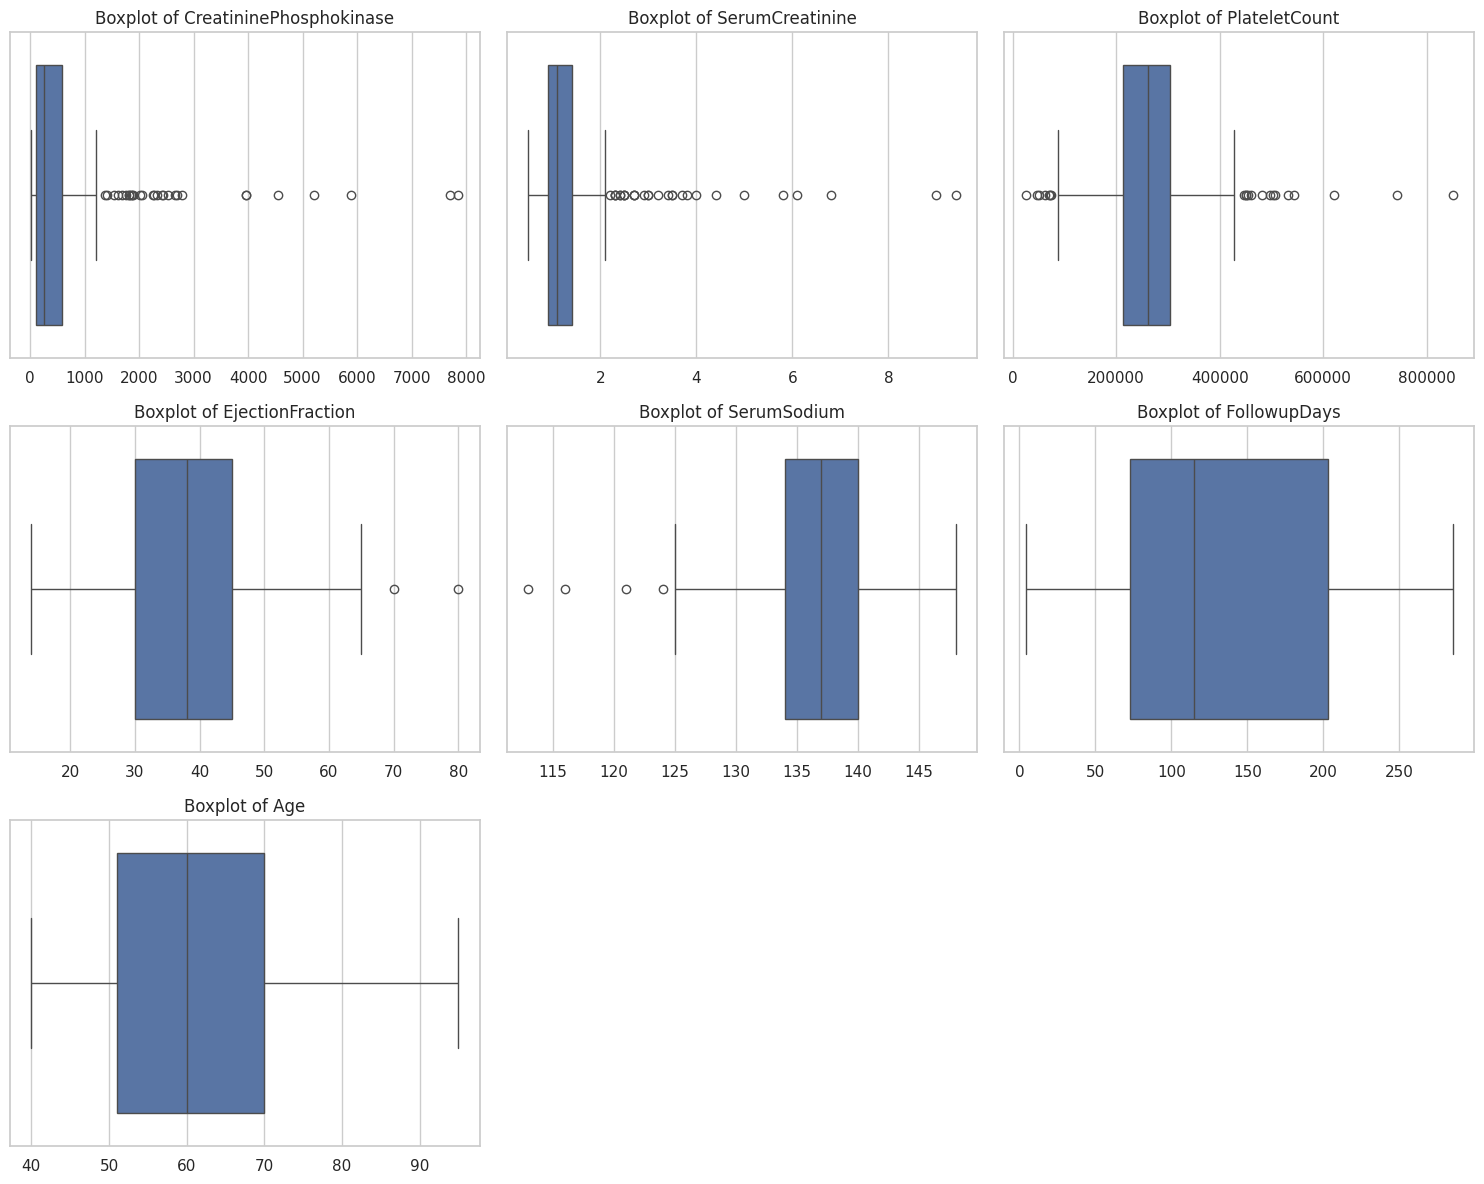

In [23]:
sns.set(style="whitegrid")


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i in range(7, len(axes)):
    fig.delaxes(axes[i])

for i, feature in enumerate(numerical_cols):
    sns.boxplot(x=df[feature], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {feature}', fontsize=12)
    axes[i].set_xlabel('')

plt.tight_layout()


plt.show()

* If Need To Drop Outliers

In [107]:
# features_with_outliers = ['creatinine_phosphokinase', 'serum_creatinine', 'platelets']

In [108]:
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_cleaned

In [109]:
# for feature in features_with_outliers:
#     original_rows = df.shape[0]
#     df = remove_outliers_iqr(df, feature)
#     rows_dropped = original_rows - df.shape[0]
#     print(f"Removed {rows_dropped} outliers from '{feature}'. New shape: {df.shape}")

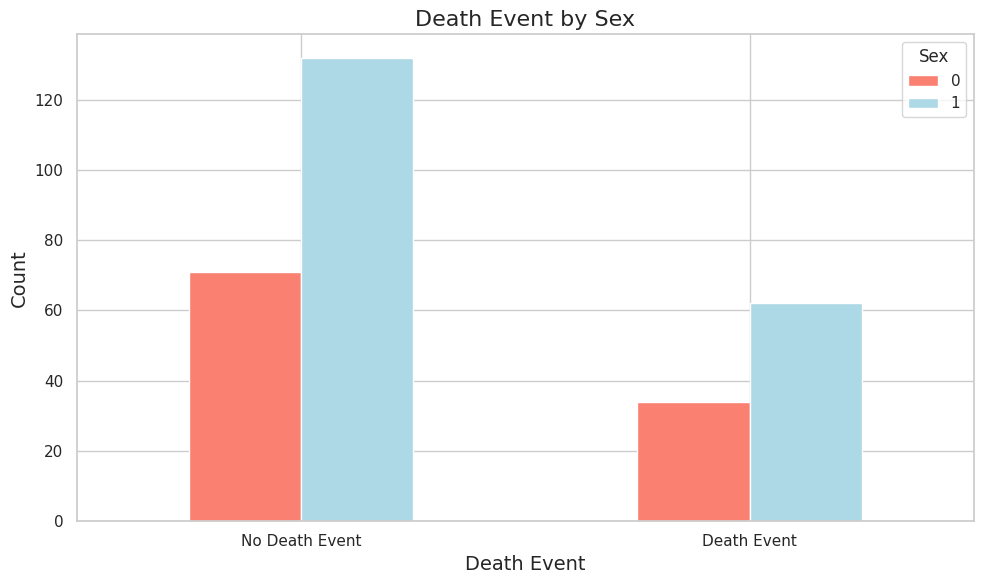

In [27]:
pd.crosstab(df.DeathEvent, df.Sex).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"]
)

plt.title("Death Event by Sex", fontsize=16)
plt.xlabel("Death Event", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])
plt.tight_layout()
plt.show()


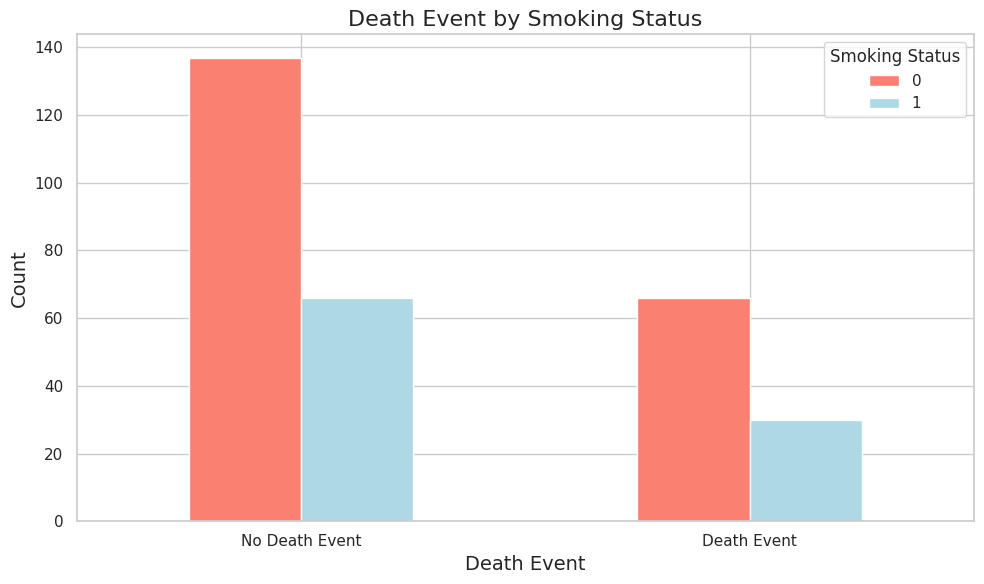

In [28]:
pd.crosstab(df.DeathEvent, df.SmokingStatus).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"]

)

plt.title("Death Event by Smoking Status", fontsize=16)
plt.xlabel("Death Event", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)  # keep category labels horizontal
plt.legend(title="Smoking Status")
plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])
plt.tight_layout()
plt.show()

 # 1. Correlation Analysis

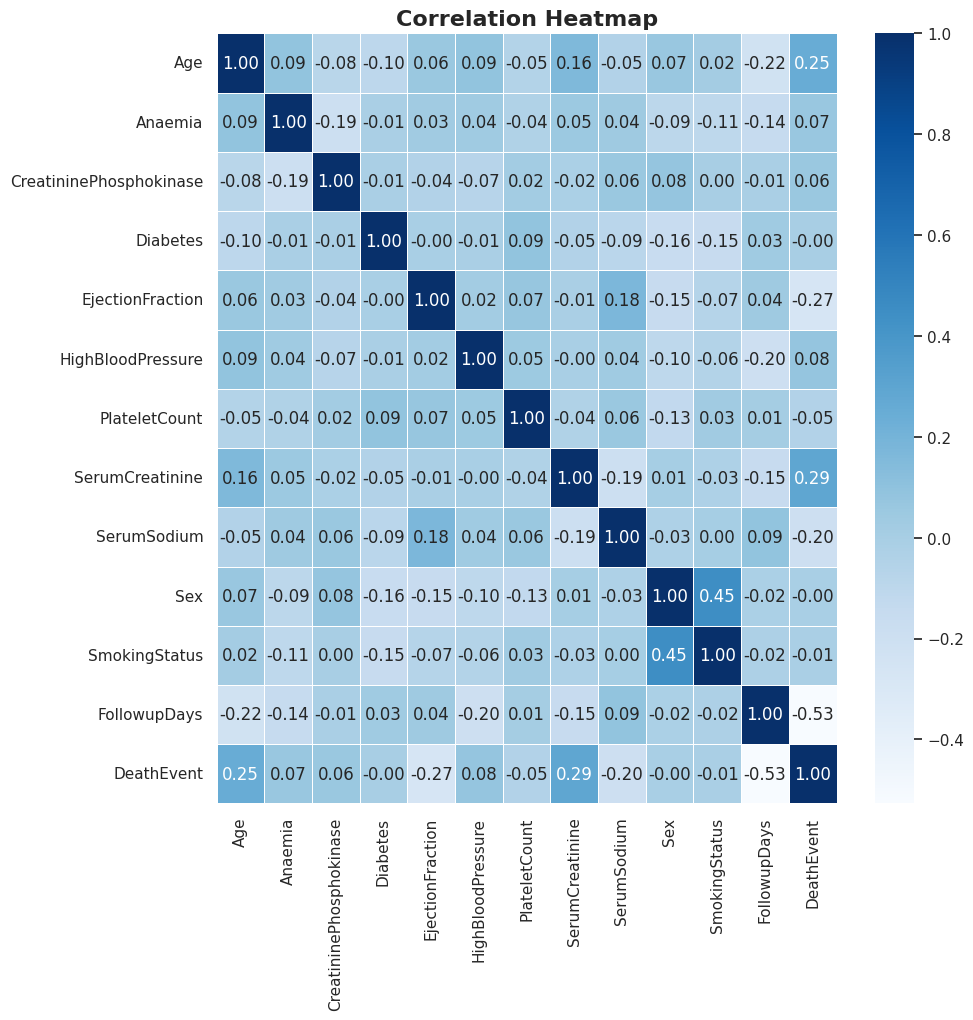

In [29]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,  annot=True, cmap='Blues', fmt='.2f', linewidths=0.5 )
plt.title('Correlation Heatmap', fontsize=16 , fontweight='bold')
# plt.savefig("correlation_matrix.png")
# print("Saved correlation_matrix.png")
plt.show()

In [41]:
df.corr()['DeathEvent'].sort_values(ascending=False).abs()

,DeathEvent
DeathEvent,1.000000
SerumCreatinine,0.294278
Age,0.253800
HighBloodPressure,0.079351
Anaemia,0.066270
CreatininePhosphokinase,0.062728
Diabetes,0.001943
Sex,0.004316
SmokingStatus,0.012623
PlateletCount,0.049139


In [42]:
X = df.drop('DeathEvent', axis=1)
y = df['DeathEvent']

In [43]:
numerical_features = X.select_dtypes(include=[np.number]).columns
# categorical_features = X.select_dtypes(exclude=[np.number]).columns


### For numerical features, use f_classif
* F-test

In [45]:
if len(numerical_features) > 0:
        print(f"\nNumerical features: {list(numerical_features)}")
        selector_f = SelectKBest(score_func=f_classif, k='all')
        X_num_selected = selector_f.fit_transform(X[numerical_features], y)
        f_scores = selector_f.scores_
        f_pvalues = selector_f.pvalues_


Numerical features: ['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes', 'EjectionFraction', 'HighBloodPressure', 'PlateletCount', 'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus', 'FollowupDays']


In [46]:
print("F-statistic scores for numerical features:")
for i, feature in enumerate(numerical_features):
            print(f"  {feature}: F-score={f_scores[i]:.3f}, p-value={f_pvalues[i]:.6f}")

F-statistic scores for numerical features:
  Age: F-score=20.448, p-value=0.000009
  Anaemia: F-score=1.310, p-value=0.253299
  CreatininePhosphokinase: F-score=1.173, p-value=0.279611
  Diabetes: F-score=0.001, p-value=0.973312
  EjectionFraction: F-score=23.094, p-value=0.000002
  HighBloodPressure: F-score=1.882, p-value=0.171149
  PlateletCount: F-score=0.719, p-value=0.397194
  SerumCreatinine: F-score=28.158, p-value=0.000000
  SerumSodium: F-score=11.765, p-value=0.000689
  Sex: F-score=0.006, p-value=0.940752
  SmokingStatus: F-score=0.047, p-value=0.827921
  FollowupDays: F-score=114.181, p-value=0.000000


* High F-score → the feature has strong discriminatory power.

* Low F-score → the feature is probably not useful.


---------------------------------------------
* Small p-value (usually < 0.05)

* Big p-value → not significant

## Feature Importance from Random Forest

In [48]:
print("\n--- 4. Random Forest Feature Importance ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

print("Random Forest feature importance:")
for _, row in feature_importance.iterrows():
        print(f"  {row['feature']}: {row['importance']:.3f}")


--- 4. Random Forest Feature Importance ---
Random Forest feature importance:
  FollowupDays: 0.344
  SerumCreatinine: 0.142
  EjectionFraction: 0.119
  Age: 0.091
  CreatininePhosphokinase: 0.087
  PlateletCount: 0.082
  SerumSodium: 0.074
  Diabetes: 0.013
  Sex: 0.013
  SmokingStatus: 0.012
  Anaemia: 0.012
  HighBloodPressure: 0.011


###  Plot feature importance


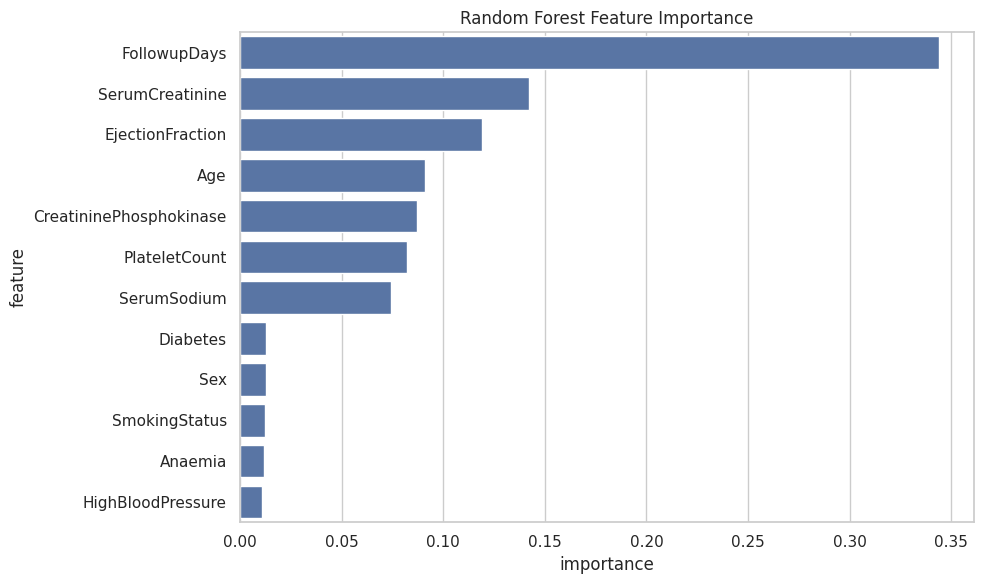

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
# plt.savefig("feature_importance.png")
# print("Saved feature_importance.png")

##  Recommendations for dropping features

In [50]:
low_rf_importance = feature_importance[feature_importance['importance'] < 0.05]
if len(low_rf_importance) > 0:
        print(f"\nFeatures with very low Random Forest importance (< 0.05):")
        for _, row in low_rf_importance.iterrows():
            print(f"  - {row['feature']} (importance: {row['importance']:.3f})")


Features with very low Random Forest importance (< 0.05):
  - Diabetes (importance: 0.013)
  - Sex (importance: 0.013)
  - SmokingStatus (importance: 0.012)
  - Anaemia (importance: 0.012)
  - HighBloodPressure (importance: 0.011)


## Features with very low correlation with target


In [51]:
target_corr = df.corr()['DeathEvent'].drop('DeathEvent').abs().sort_values(ascending=False)

In [52]:
low_target_corr = target_corr[target_corr < 0.05]
if len(low_target_corr) > 0:
        print(f"\nFeatures with very low correlation with target (< 0.05):")
        for feature in low_target_corr.index:
            print(f"  - {feature} (correlation: {low_target_corr[feature]:.3f})")


Features with very low correlation with target (< 0.05):
  - PlateletCount (correlation: 0.049)
  - SmokingStatus (correlation: 0.013)
  - Sex (correlation: 0.004)
  - Diabetes (correlation: 0.002)


In [33]:
print(f"Original dataset shape: {X.shape}")
print(f"Features: {list(X.columns)}")

Original dataset shape: (299, 12)
Features: ['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes', 'EjectionFraction', 'HighBloodPressure', 'PlateletCount', 'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus', 'FollowupDays']


Now Can Drop

* Diabetes
* Sex
-----------------------------------------------


In [54]:
X.drop(columns=['Diabetes', 'Sex'], inplace=True)

###     Demonstrates techniques for handling imbalanced datasets.


In [55]:
df['DeathEvent'].value_counts()

,count
DeathEvent,
0,203
1,96


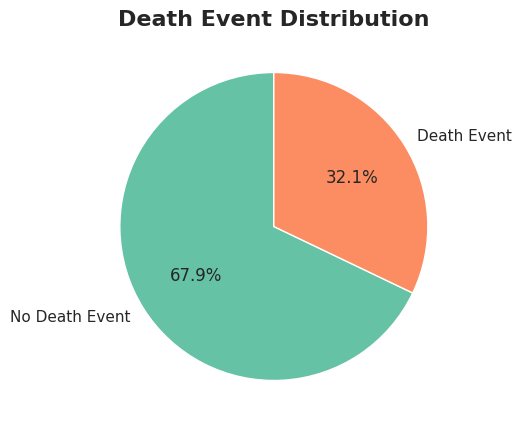

In [56]:
df['DeathEvent'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(8, 5),
    colors = ['#66c2a5', '#fc8d62'],
    labels=['No Death Event', 'Death Event']
)

plt.title('Death Event Distribution', fontsize=16, fontweight='bold')
plt.ylabel("")
plt.show()

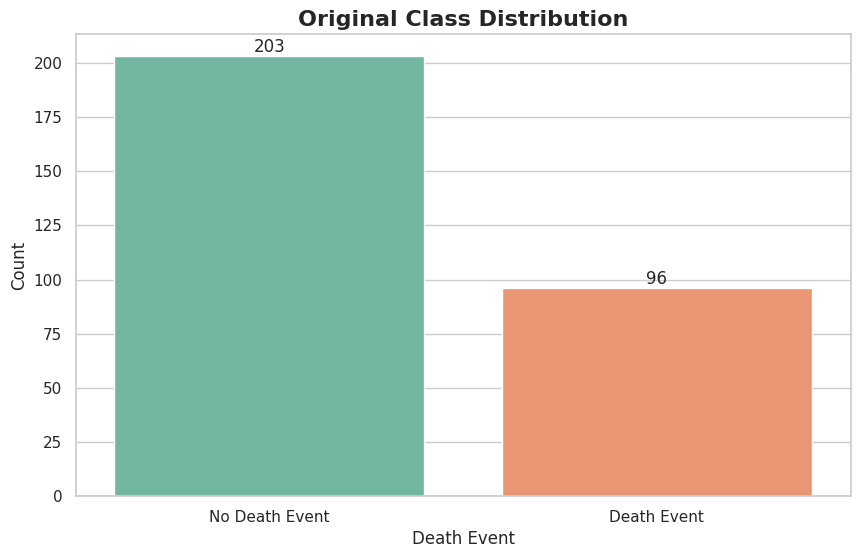

In [59]:
plt.figure(figsize=(10, 6))
ax =sns.countplot(x='DeathEvent', data=df, palette='Set2')
plt.title('Original Class Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# 1. Applying SMOTE Oversampling

In [63]:
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X, y)
print("Resampled dataset shape (SMOTE): %s" % Counter(y_res_smote))

Resampled dataset shape (SMOTE): Counter({1: 203, 0: 203})


[Text(0, 0, '203')]

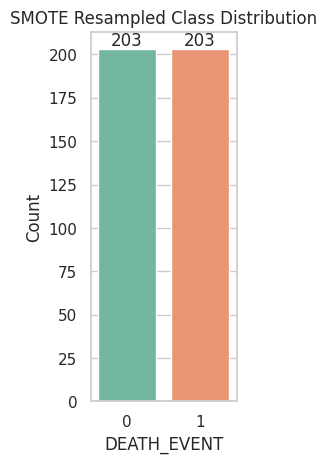

In [68]:
plt.subplot(1, 3, 2)
ax = sns.countplot(x=y_res_smote,palette='Set2')
plt.title("SMOTE Resampled Class Distribution")
plt.xlabel("DEATH_EVENT")
plt.ylabel("Count")
# plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# 2. Undersampling with RandomUnderSampler

In [70]:
rus = RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(X, y)
print("Resampled dataset shape (RandomUnderSampler): %s" % Counter(y_res_rus))

Resampled dataset shape (RandomUnderSampler): Counter({0: 96, 1: 96})


[Text(0, 0, '96')]

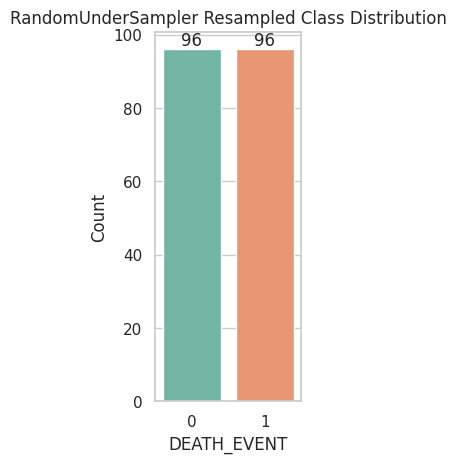

In [73]:
plt.subplot(1, 3, 2)
ax = sns.countplot(x=y_res_rus,palette='Set2')
plt.title("RandomUnderSampler Resampled Class Distribution")
plt.xlabel("DEATH_EVENT")
plt.ylabel("Count")
# plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [74]:
# plt.savefig("imbalance_handling_distributions.png")
# print("Saved imbalance_handling_distributions.png")

## 3.  Applying SMOTEENN Combined Sampling

In [76]:
sme = SMOTEENN(random_state=42)
X_res_sme, y_res_sme = sme.fit_resample(X, y)
print("Resampled dataset shape (SMOTEENN): %s" % Counter(y_res_sme))

Resampled dataset shape (SMOTEENN): Counter({1: 49, 0: 34})


[Text(0, 0, '49')]

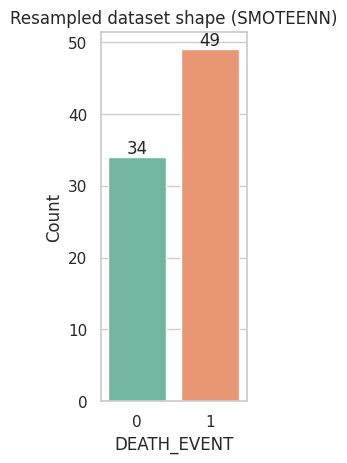

In [77]:
plt.subplot(1, 3, 2)
ax = sns.countplot(x=y_res_sme,palette='Set2')
plt.title("Resampled dataset shape (SMOTEENN)")
plt.xlabel("DEATH_EVENT")
plt.ylabel("Count")
# plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

#  Spilting

In [119]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [120]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (209, 10)
Shape of X_test: (90, 10)


In [121]:
numerical_features = [
    'Age', 'CreatininePhosphokinase', 'EjectionFraction',
    'PlateletCount', 'SerumCreatinine', 'SerumSodium', 'FollowupDays'
]


#  1. Visualize the original data distribution

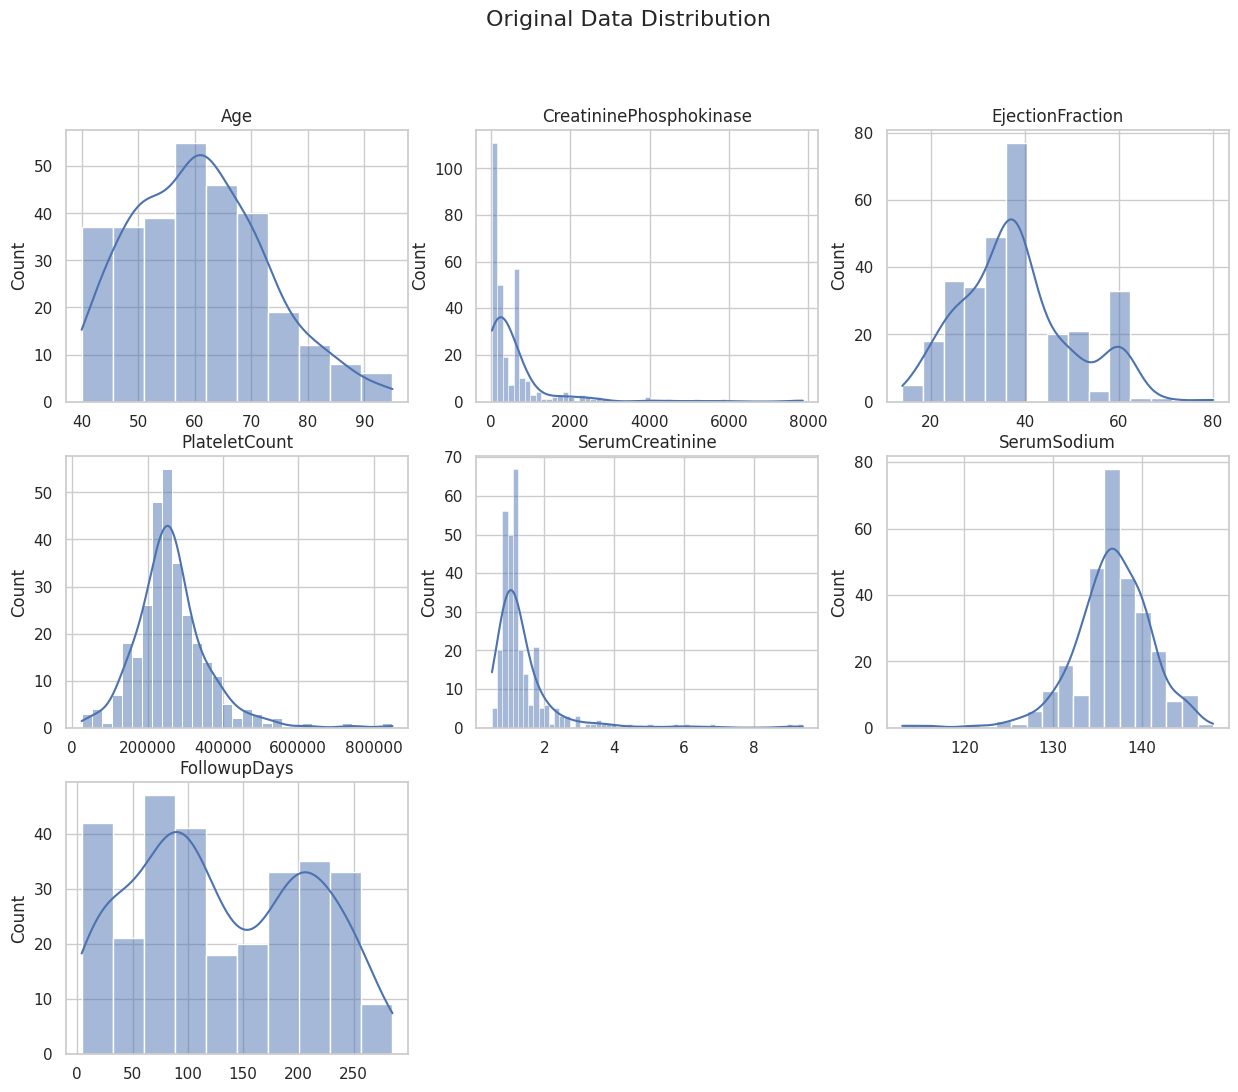

In [100]:
plt.figure(figsize=(15, 12))
plt.suptitle('Original Data Distribution', fontsize=16)
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
    plt.xlabel('')
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('original_data_distribution.png')
# plt.show()


# StanderdScaler

In [122]:
scaler_standard = StandardScaler()

* Fit_Transform  Just For X_train

In [123]:
X_train_scaled_standard = scaler_standard.fit_transform(X_train[numerical_features])
X_test_scaled_standard = scaler_standard.transform(X_test[numerical_features])

In [124]:
X_train_scaled_standard_df = pd.DataFrame(X_train_scaled_standard, columns=numerical_features, index=X_train.index)
X_test_scaled_standard_df = pd.DataFrame(X_test_scaled_standard, columns=numerical_features, index=X_test.index)

In [125]:
X_train_final_standard = X_train.copy()
X_train_final_standard.update(X_train_scaled_standard_df)

X_test_final_standard = X_test.copy()
X_test_final_standard.update(X_test_scaled_standard_df)

In [126]:
X_train_final_standard.head()

,Age,Anaemia,CreatininePhosphokinase,EjectionFraction,HighBloodPressure,PlateletCount,SerumCreatinine,SerumSodium,SmokingStatus,FollowupDays
224,-0.237288,0,0.007231,-1.161762,0,2.660248,-0.373951,0.297672,0,0.917167
68,0.792328,0,-0.448525,-1.161762,0,-0.199304,-0.173475,1.226232,0,-0.866991
222,-1.610110,1,-0.529717,-0.295518,0,1.131488,-0.273713,0.529812,1,0.865825
37,1.821945,1,0.302769,1.003848,1,0.647563,-0.373951,1.922652,0,-1.329076
16,2.250952,1,-0.461516,-0.035644,0,-0.001335,-0.474190,0.761952,0,-1.534447


In [127]:
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df_standard_scaled[numerical_features])

#  2. Visualize StandardScaler data distribution

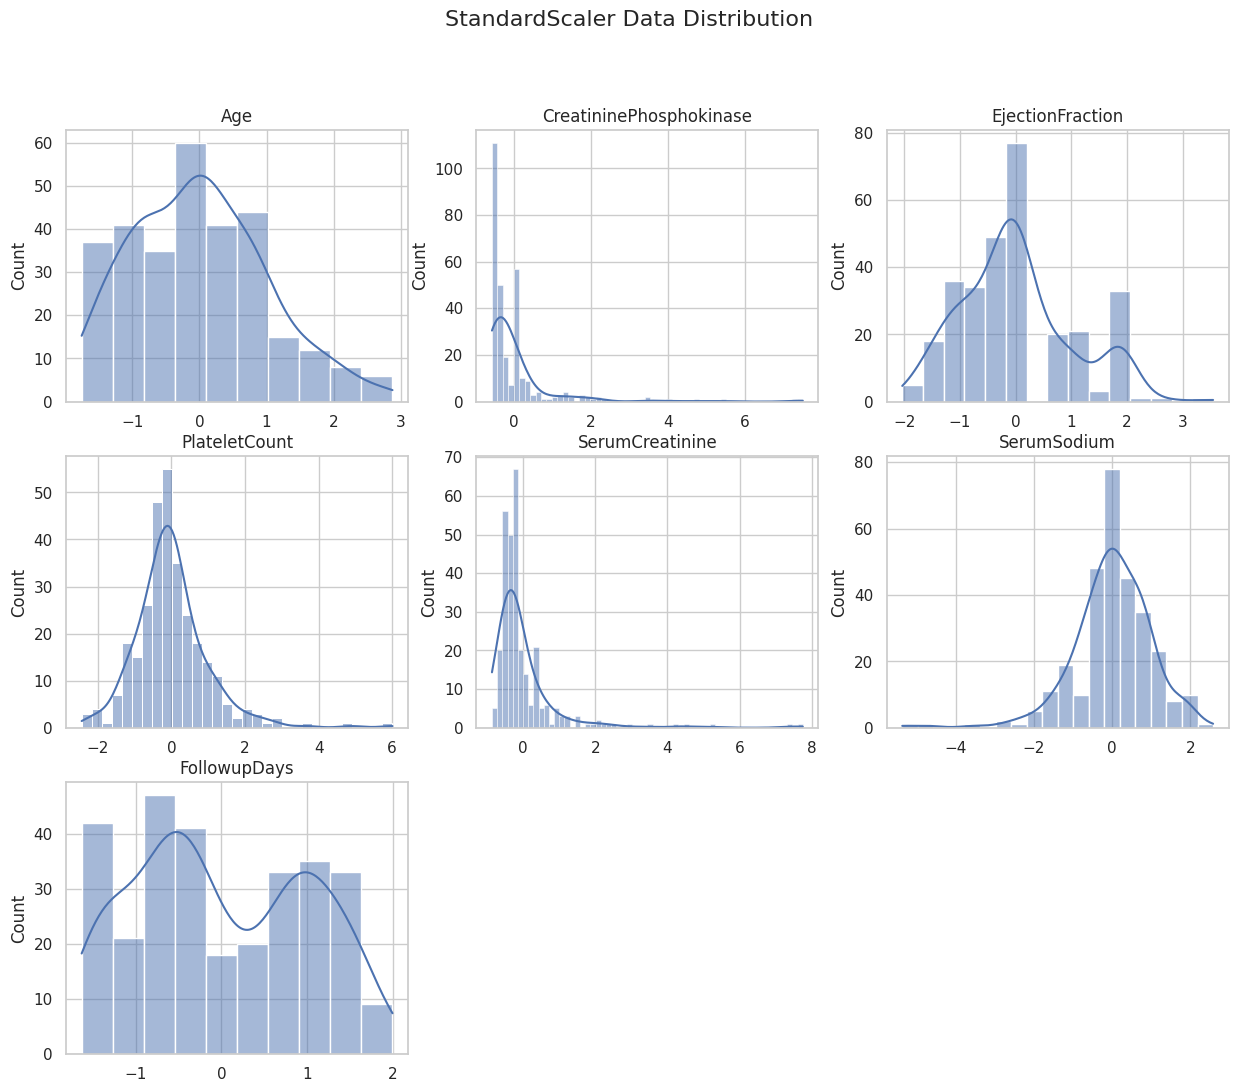

In [104]:
plt.figure(figsize=(15, 12))
plt.suptitle('StandardScaler Data Distribution', fontsize=16)

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_standard_scaled[feature], kde=True)
    plt.title(feature)
    plt.xlabel('')

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('standardscaler_data_distribution.png')
# plt.show()

# MinMax

In [91]:
scaler_minmax = MinMaxScaler()


*  This prevents data leakage from the test set

*   Fit_Transform  Just For X_train

In [92]:
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train[numerical_features])
X_test_scaled_minmax = scaler_minmax.transform(X_test[numerical_features])


In [93]:
X_train_scaled_minmax_df = pd.DataFrame(X_train_scaled_minmax, columns=numerical_features, index=X_train.index)
X_test_scaled_minmax_df = pd.DataFrame(X_test_scaled_minmax, columns=numerical_features, index=X_test.index)

In [94]:
X_train_final_minmax = X_train.copy()
X_train_final_minmax.update(X_train_scaled_minmax_df)

X_test_final_minmax = X_test.copy()
X_test_final_minmax.update(X_test_scaled_minmax_df)

In [113]:
X_test_final_minmax.head()

,Age,Anaemia,CreatininePhosphokinase,EjectionFraction,HighBloodPressure,PlateletCount,SerumCreatinine,SerumSodium,SmokingStatus,FollowupDays
281,0.545455,0,0.071319,0.333333,0,-0.019678,0.258824,0.696970,1,0.875445
265,0.181818,1,0.035085,0.250000,0,0.536673,0.047059,0.818182,1,0.839858
164,0.090909,0,0.308625,0.166667,0,0.486583,0.070588,0.787879,0,0.444840
9,0.727273,1,0.012758,0.250000,1,0.583184,1.047059,0.606061,1,0.021352
77,0.036364,0,0.010079,0.333333,0,0.313059,0.082353,0.818182,0,0.249110


In [105]:
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df_minmax_scaled[numerical_features])

# 3. Visualize MinMaxScaler data distribution

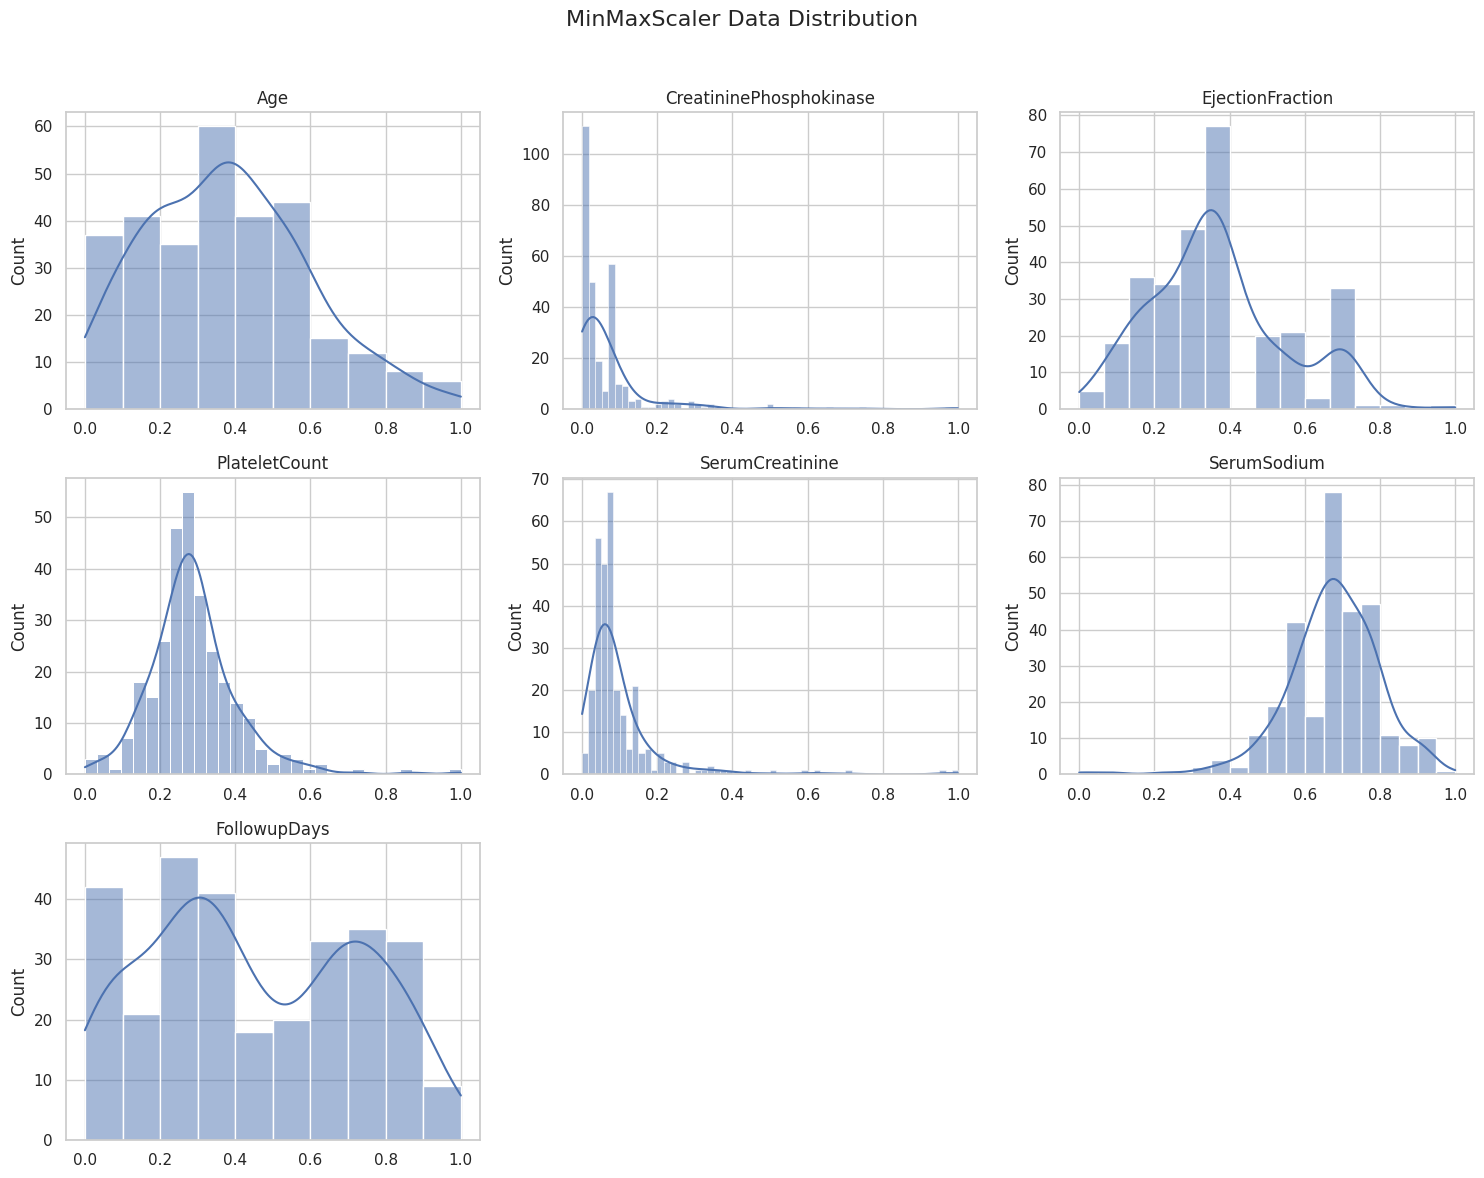

In [106]:
plt.figure(figsize=(15, 12))
plt.suptitle('MinMaxScaler Data Distribution', fontsize=16)

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_minmax_scaled[feature], kde=True)
    plt.title(feature)
    plt.xlabel('')

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('minmaxscaler_data_distribution.png')
# plt.show()

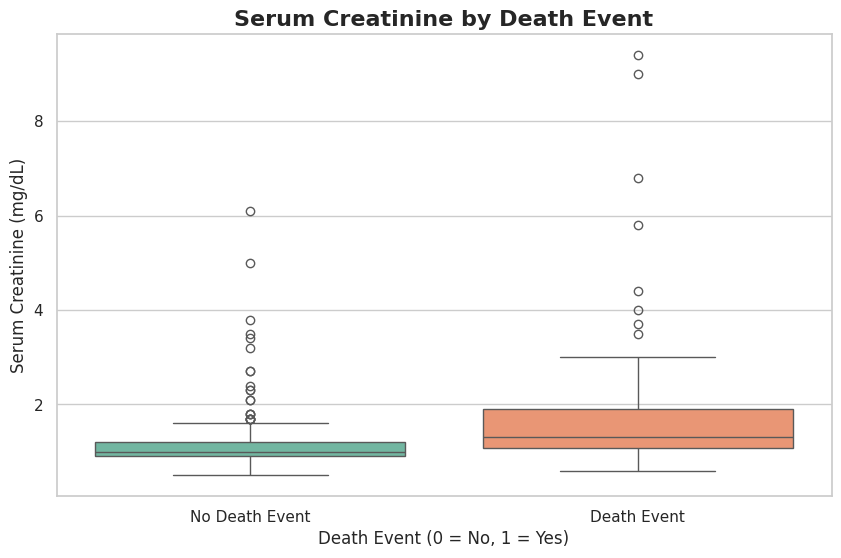

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DeathEvent', y='SerumCreatinine', data=df, palette="Set2")
# sns.stripplot(x='DeathEvent', y='SerumCreatinine', data=df, color='black', size=3, jitter=True)

plt.title("Serum Creatinine by Death Event", fontsize=16, fontweight='bold')
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.xticks([0, 1], ["No Death Event", "Death Event"])
plt.show()

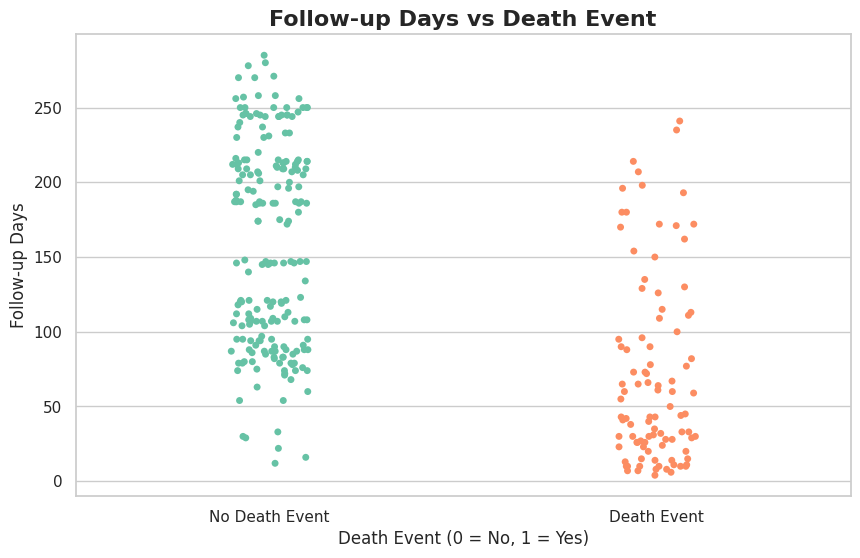

In [111]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='DeathEvent', y='FollowupDays', data=df, jitter=True, palette="Set2")

plt.title("Follow-up Days vs Death Event", fontsize=16, fontweight='bold')
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Follow-up Days")
plt.xticks([0, 1], ["No Death Event", "Death Event"])
plt.show()

In [148]:
# sme = SMOTEENN(random_state=42)
X_res_sme, y_res_sme = sme.fit_resample(X, y)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X , y , stratify=y, random_state=42)

In [176]:
X_train.shape

(224, 10)

In [177]:
X_test.shape

(75, 10)

In [178]:
y_train.shape

(224,)

# Modeling

In [228]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'SVC': SVC(probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier()

}

In [236]:
parameters = {
    'LogisticRegression': {
        'clf__C': np.logspace(-3, 3, 7),
        'clf__class_weight': ['balanced'],
        'clf__penalty': ['l2'],
        'clf__solver': ['liblinear']
    },
    'SVC': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ["scale", 0.001, 0.01, 0.1],
        'clf__class_weight': ['balanced']
    },
    'DecisionTreeClassifier': {
        'clf__max_depth': [5, 10],
        'clf__min_samples_split': [2, 5 ],
        'clf__min_samples_leaf': [1, 2],
        'clf__class_weight': ['balanced'],
        'clf__criterion': ['gini', 'entropy']
    },
    'RandomForestClassifier': {
        'clf__n_estimators': [10, 20, 50, 100],
        'clf__max_depth': [5, 10, 15],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': ['balanced', 'balanced_subsample'],

    },
       'XGBClassifier': {
          'clf__learning_rate'  : [0.1],
                'clf__max_depth'  : [5],
                'clf__n_estimators': [50],
                'clf__scale_pos_weight':[ 3],
                'clf__subsample' : [0.8],
                'clf__use_label_encoder': [False],
                'clf__eval_metric'  : ['logloss']
    }

}

# Train

In [237]:
results = []

for name, model in models.items():

    print(f"Training {name}........")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
       ('clf', model)

    ])

    param_grid = parameters.get(name, {})

    # Grid search
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    results.append({
        'name': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid.best_estimator_  # store the fitted model
    })

# Sort by score (descending)
results_sorted = sorted(results, key=lambda x: x['best_score'], reverse=True)

top_5 = results_sorted[:5]



Training LogisticRegression........
Training SVC........
Training DecisionTreeClassifier........
Training RandomForestClassifier........
Training XGBClassifier........


# print leaderboard

In [205]:
# from tabulate import tabulate
# from termcolor import colored

# print(colored("\n Leaderboard In Train", "cyan", attrs=["bold"]))

# table_data = []
# best_model = None
# best_accuracy = -1
# best_entry = None

# for r in results_sorted:
#     table_data.append([
#         r['name'],
#         f"{r['best_score']:.4f}",
#         r['best_params']
#     ])
#     if r['best_score'] > best_accuracy:
#         best_accuracy = r['best_score']
#         best_model = r['model']
#         best_entry = r

# # Print leaderboard table
# print(tabulate(table_data, headers=["Model", "Best Score", "Best Params"], tablefmt="fancy_grid"))

# # Best model details
# print(colored("\n Best Model", "green", attrs=["bold"]))
# print(f"Name      : {best_entry['name']}")
# print(f"Accuracy  : {best_accuracy:.4f}")
# print(f"Best Params: {best_entry['best_params']}")



 Leaderboard In Train
╒════════════════════════╤══════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Model                  │   Best Score │ Best Params                                                                                                                                                                                  │
╞════════════════════════╪══════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ RandomForestClassifier │       0.8751 │ {'clf__class_weight': 'balanced', 'clf__max_depth': 10, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 20}                                                                                 │
├────────────────────────┼──────────────┼────

In [245]:
from tabulate import tabulate
from termcolor import colored

print(colored("\n Leaderboard In Train", "cyan", attrs=["bold"]))

table_data = []
best_model = None
best_accuracy = -1
best_entry = None

for r in results_sorted:
    table_data.append([
        r['name'],
        f"{r['best_score']:.4f}",
        r['best_params']
    ])
    if r['best_score'] > best_accuracy:
        best_accuracy = r['best_score']
        best_model = r['model']
        best_entry = r

# Print leaderboard table
print(tabulate(table_data, headers=["Model", "Best Score", "Best Params"], tablefmt="fancy_grid"))

# Best model details
print(colored("\n Best Model", "green", attrs=["bold"]))
print(f"Name      : {best_entry['name']}")
print(f"Accuracy  : {best_accuracy:.4f}")
print(f"Best Params: {best_entry['best_params']}")



 Leaderboard In Train
╒════════════════════════╤══════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Model                  │   Best Score │ Best Params                                                                                                                                                                                  │
╞════════════════════════╪══════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ RandomForestClassifier │       0.8858 │ {'clf__class_weight': 'balanced_subsample', 'clf__max_depth': 15, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 20}                                                                       │
├────────────────────────┼──────────────┼────

In [235]:
from tabulate import tabulate

for res in top_5:
    model_name = res['name']
    model = res['model']

    # Predictions
    y_pred = model.predict(X_test)

    # Main metrics
    acc = accuracy_score(y_test, y_pred)
    recall_sco = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Probability or decision scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = None

    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_scores)

    # Print results
    print(f"\n{'='*15}  {model_name}  {'='*15}")
    table = [
        ["Accuracy", f"{acc:.4f}"],
        ["Recall", f"{recall_sco:.4f}"],
        ["F1 Score", f"{f1:.4f}"],
        ["ROC AUC", f"{roc_auc:.4f}" if roc_auc is not None else "N/A"]
    ]
    print(tabulate(table, headers=["Metric", "Score"], tablefmt="pretty"))

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("#" * 60)



===============  RandomForestClassifier  ===============
+----------+--------+
|  Metric  | Score  |
+----------+--------+
| Accuracy | 0.8267 |
|  Recall  | 0.6667 |
| F1 Score | 0.7111 |
| ROC AUC  | 0.8995 |
+----------+--------+

Classification Report:
              precision    recall  f1-score   support

           0     0.8519    0.9020    0.8762        51
           1     0.7619    0.6667    0.7111        24

    accuracy                         0.8267        75
   macro avg     0.8069    0.7843    0.7937        75
weighted avg     0.8231    0.8267    0.8234        75

############################################################

===============  XGBClassifier  ===============
+----------+--------+
|  Metric  | Score  |
+----------+--------+
| Accuracy | 0.8400 |
|  Recall  | 0.7083 |
| F1 Score | 0.7391 |
| ROC AUC  | 0.8472 |
+----------+--------+

Classification Report:
              precision    recall  f1-score   support

           0     0.8679    0.9020    0.8846       

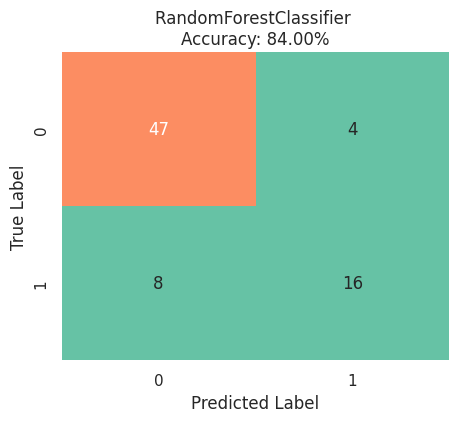

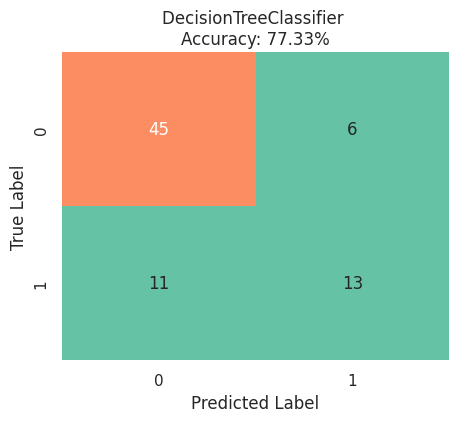

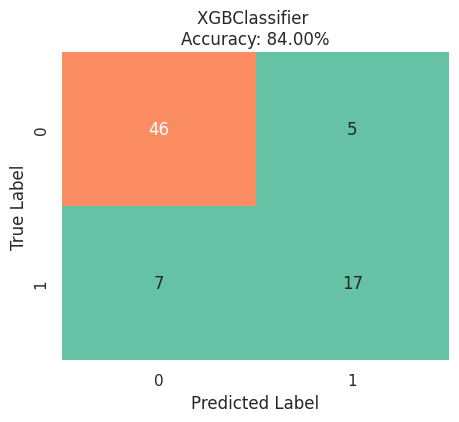

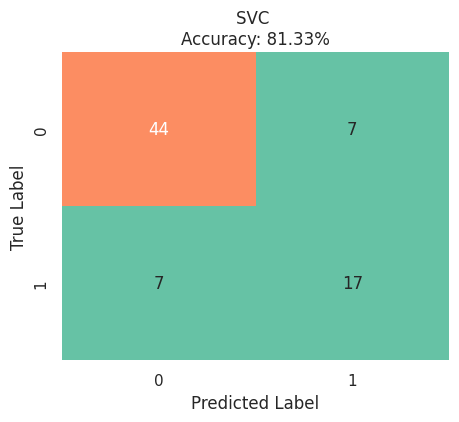

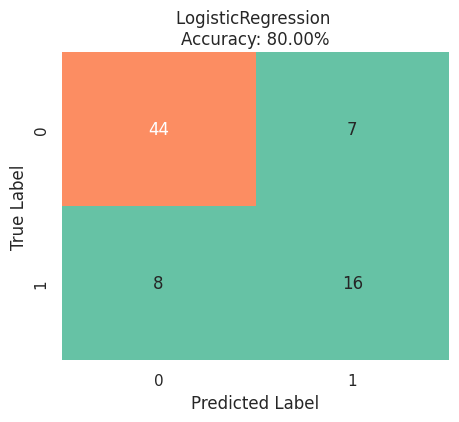

In [232]:
from matplotlib.colors import ListedColormap
colors = ['#66c2a5', '#fc8d62']  # greenish & orange
cmap_custom = ListedColormap(colors)

for res in top_5:
    model_name = res['name']
    model = res['model']

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y_test)

    # --- Plot ---
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap_custom, cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} \nAccuracy: {acc:.2%}")

    plt.show()



In [ ]:
 # # Save PNG
    # plt.tight_layout()
    # plt.savefig(f"confusion_matrix_{model_name}.png", dpi=300)
    # plt.show()  # show in notebook / console
    # plt.close()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Second Train

In [ ]:
import sklearn
sklearn.__version__

'1.6.1'

In [208]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'SVC': SVC(probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier'        :  XGBClassifier()

}

In [215]:
parameters = {
     'LogisticRegression': {
        'clf__C': np.logspace(-3, 3, 7),
        'clf__class_weight': ['balanced'],
        'clf__penalty': ['l2', 'l1'],
        'clf__solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'clf__C': [0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ["scale", "auto", 0.001, 0.01, 0.1, 1, 10],
        'clf__class_weight': [None, 'balanced']
    },
    'DecisionTreeClassifier': {
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced'],
        'clf__criterion': ['gini', 'entropy']
    },
    'RandomForestClassifier': {
        'clf__n_estimators': [10, 20, 50, 100],
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced', 'balanced_subsample'],
        },
     'XGBClassifier': {
          'clf__learning_rate'  : [0.1],
                'clf__max_depth'  : [5],
                'clf__n_estimators': [50],
                'clf__scale_pos_weight':[ 3],
                'clf__subsample' : [0.8],
                'clf__use_label_encoder': [False],
                'clf__eval_metric'  : ['logloss']
           }
}

In [ ]:
# df.columns

Index(['Age', 'Anaemia', 'CreatininePhosphokinase', 'Diabetes',
       'EjectionFraction', 'HighBloodPressure', 'PlateletCount',
       'SerumCreatinine', 'SerumSodium', 'Sex', 'SmokingStatus',
       'FollowupDays', 'DeathEvent'],
      dtype='object')

In [187]:
x_without = X.drop(columns=['Anaemia'])
y = df['DeathEvent']

In [211]:
# x_without

In [242]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_without, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [243]:
results = []

for name, model in models.items():
    print(f"Training {name}........")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    param_grid = parameters.get(name, {})

    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_.named_steps['clf']
    feature_importance = None

    if hasattr(best_model, "feature_importances_"):  # For tree-based models
        feature_importance = pd.Series(
            best_model.feature_importances_,
            index=x_train.columns
        ).sort_values(ascending=False)

    elif hasattr(best_model, "coef_"):  # For linear models
        feature_importance = pd.Series(
            best_model.coef_[0],
            index=x_train.columns
        ).sort_values(ascending=False)

    results.append({
        'name': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid.best_estimator_,
        'feature_importance': feature_importance
    })

results_sorted = sorted(results, key=lambda x: x['best_score'], reverse=True)

top_5 = results_sorted[:5]




Training LogisticRegression........
Training SVC........
Training DecisionTreeClassifier........
Training RandomForestClassifier........
Training XGBClassifier........


In [244]:

# os.makedirs("saved_models", exist_ok=True)

results = []

for name, model in models.items():
    print(f"Training {name}........")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    param_grid = parameters.get(name, {})

    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_.named_steps['clf']
    feature_importance = None

    if hasattr(best_model, "feature_importances_"):
        feature_importance = pd.Series(
            best_model.feature_importances_,
            index=x_train.columns
        ).sort_values(ascending=False)

    elif hasattr(best_model, "coef_"):
        feature_importance = pd.Series(
            best_model.coef_[0],
            index=x_train.columns
        ).sort_values(ascending=False)

    # # Save the entire pipeline (with scaler + model)
    # model_path = f"saved_models/{name}_model.pkl"
    # joblib.dump(grid.best_estimator_, model_path)

    results.append({
        'name': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid.best_estimator_,
        'feature_importance': feature_importance,
        # 'model_path': model_path
    })

# Sort results by best score
results_sorted = sorted(results, key=lambda x: x['best_score'], reverse=True)
top_5 = results_sorted[:5]

Training LogisticRegression........
Training SVC........
Training DecisionTreeClassifier........
Training RandomForestClassifier........
Training XGBClassifier........


In [218]:
for res in top_5:
    model_name = res['name']
    model = res['model']

    # Predict on test set
    y_pred = model.predict(x_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    class_report = classification_report(y_test, y_pred)

    # Get predicted scores for ROC AUC if possible
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(x_test)
    else:
        y_scores = None

    roc_auc = roc_auc_score(y_test, y_scores) if y_scores is not None else float('nan')

    # Print nicely formatted results
    print(f"\n{'='*10} Evaluation for model: {model_name} {'='*10}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Recall     : {recall:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}" if y_scores is not None else "ROC AUC    : N/A (no probability or decision function)")
    print("\nClassification Report:\n", class_report)
    print("#" * 80)


========== Evaluation for model: RandomForestClassifier ==========
Accuracy   : 0.9444
Recall     : 1.0000
F1 Score   : 0.9565
ROC AUC    : 0.9416

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.92      1.00      0.96        11

    accuracy                           0.94        18
   macro avg       0.96      0.93      0.94        18
weighted avg       0.95      0.94      0.94        18

################################################################################

========== Evaluation for model: DecisionTreeClassifier ==========
Accuracy   : 0.8889
Recall     : 0.9091
F1 Score   : 0.9091
ROC AUC    : 0.8831

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.91      0.91      0.91        11

    accuracy                           0.89        18
   macro avg       0.88     

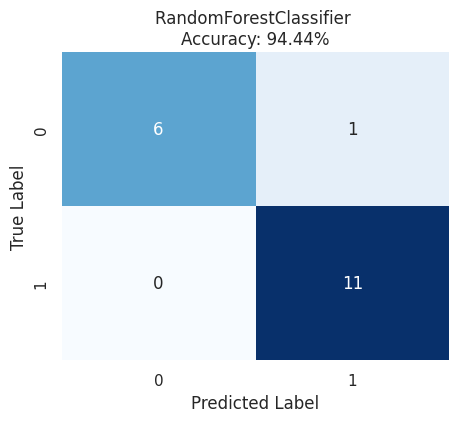

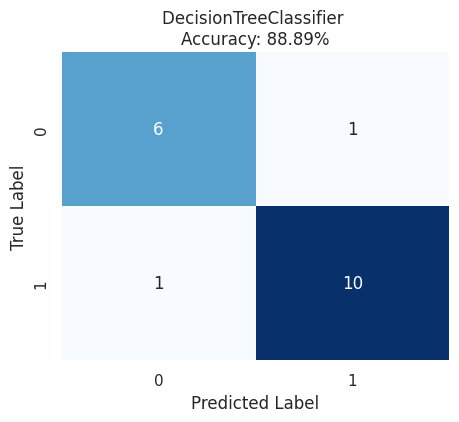

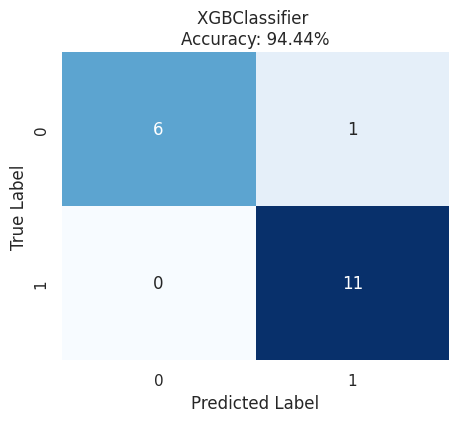

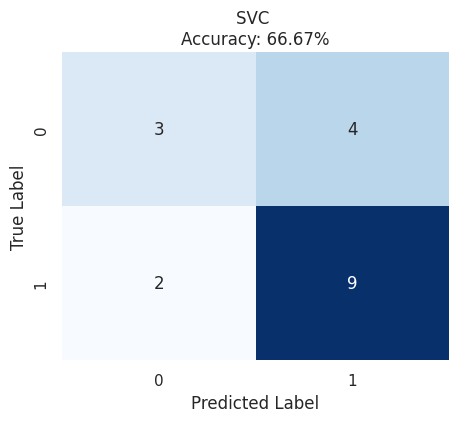

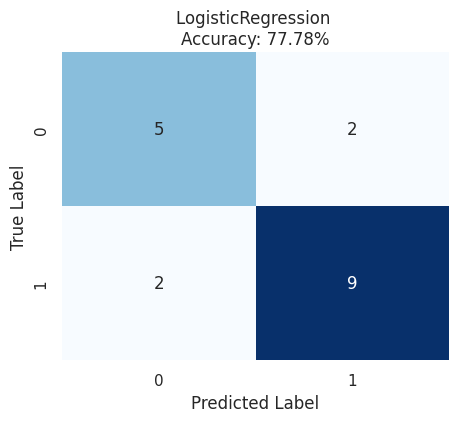

In [221]:
for res in top_5:

    model_name = res['name']
    model = res['model']

    # Predictions
    y_pred = model.predict(x_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y_test)

    # --- Plot ---
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} \nAccuracy: {acc:.2%}")



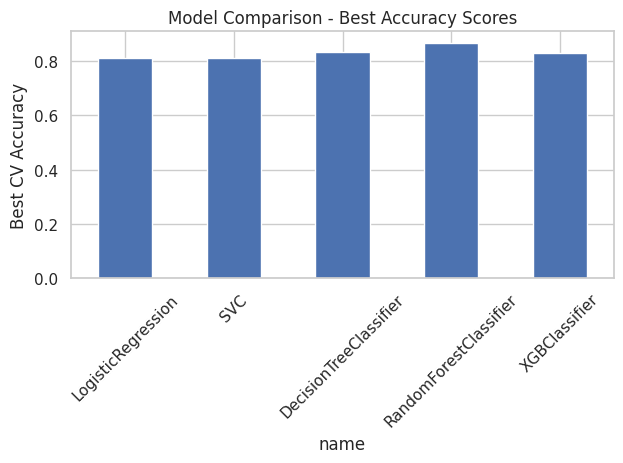

In [239]:
model_compare = pd.DataFrame(results)

model_compare.set_index('name', inplace=True)

model_compare['best_score'].plot.bar()

plt.ylabel('Best CV Accuracy')
plt.title('Model Comparison - Best Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

#  Save PNG

In [ ]:

    # plt.tight_layout()
    # plt.savefig(f"confusion_matrix_{model_name}.png", dpi=300)
    # plt.show()  # show in notebook / console
    # plt.close()